# Building an Image Classification Model with Artificial Neural Network

CRISP-ML(Q) Methodology
*   Business and Data Understanding
*   Data Preparation (Data Engineering)
*   Model Building (Machine Learning)
*   Model Evaluation and Tuning
*   Deployment
*   Monitoring and Maintenance



# Stage1 : Business and Data Understanding

- The goal in this model building is to take an image of a handwritten single digit, and determine what that digit is. The project aims to evaluate the hand writtern numbers (0-9).

- Business Objectives: Maximize the ability to recognize hand writtern documents

- Constraints: Availability of data (More data will always give better accuracy)

# Stage1(a) : Data Collection

- The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. In our case, we have taken a subset of these data with training set of 5000 examples, and a test set of 1000 examples (http://yann.lecun.com/exdb/mnist/).

# Stage1(b) : Data Dictionary

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

- The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.



# Install/import required libraries

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

In [1]:
from tensorflow.keras.layers import Dense
# Import necessary libraries for MLP and reshaping the data structres
# from keras.datasets import mnist
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from keras.utils import np_utils
# from tensorflow.keras.layers import Dense
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout,Flatten

## Loading data from MySQL database

- The Train and Test datasets were stored in SQL database (Secondary data source) and using connectors, the data is being loaded in to python for model building process



In [4]:
pip install mysql

In [5]:
pip install mysql.connector

  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp39-cp39-win_amd64.whl size=247961 sha256=4b3b0e2e2b7822bd36dfb913e905516621190c37b8c1b741117071e3ec2bd8bf
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\7b\14\39\5aad423666e827dfe9a1fbcd111ac17171e7c9865d570780ce
Successfully built mysql.connector



In [ ]:
import mysql.connector as sql

mydb = sql.connect(
  host="localhost",
  user="root",
  password="Password",
  auth_plugin='mysql_native_password'
)
print(mydb)

In [ ]:
#Train Data
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM ann.train_sample")
myresult = mycursor.fetchall()

In [ ]:
num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]
train = pd.DataFrame(myresult,columns = field_names)
train.head()

In [ ]:
#Test Data
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM ann.test_sample")
myresult = mycursor.fetchall()

In [ ]:
num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]
test = pd.DataFrame(myresult,columns = field_names)
test.head()

## Loading the data set using pandas as data frame format

In [2]:
import pandas as pd
train = pd.read_csv("C:/Users/dell/Desktop/Data2/ANN_MLP/train_sample.csv")
test = pd.read_csv("C:/Users/dell/Desktop/Data2/ANN_MLP/test_sample.csv")

## Stage 2 : Data Preparation (Data Engineering)

## Stage 2(a) : Exploratory Data Analysis

In [3]:
new_train_f = train.drop(["label"],axis=1)

In [4]:
new_train_f = new_train_f.values.reshape(-1,28,28,1)

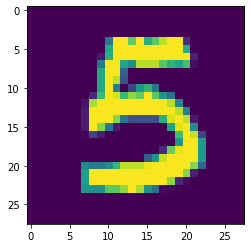

In [5]:
import matplotlib.pyplot as plt
plt.imshow(new_train_f[2999][:,:,0])

In [6]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train and Test data - Data splitting

In [7]:
# Separating the data set into 2 parts - all the inputs and label columns
# converting the integer type into float32 format 
x_train = train.iloc[:,1:].values.astype("float32")
x_test = test.iloc[:,1:].values.astype("float32")
y_train = train.label.values.astype("float32")
y_test = test.label.values.astype("float32")

## Data Normalization

In [8]:
# Normalizing the inputs to fall under 0-1 by 
# diving the entire data with 255 (max pixel value)
x_train = x_train/255
x_test = x_test/255

In [9]:
# one hot encoding outputs for both train and test data sets 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [10]:
# Storing the number of classes into the variable num_of_classes 
num_of_classes = y_test.shape[1]
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(1000, 10)

## Stage 3 : Model Building (Machine Learning)

In [11]:
# Creating a user defined function to return the model for which we are
# giving the input to train the ANN mode
def design_mlp():
    # Initializing the model 
    model = Sequential()
    model.add(Dense(150, input_dim =784, activation="relu"))
    model.add(Dense(200, activation="tanh"))
    model.add(Dense(100, activation="tanh"))
    
    model.add(Dense(num_of_classes, activation="softmax"))
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [12]:
# building a ANN model using train data set and validating on test data set
model = design_mlp()

# fitting model on train data
model.fit(x=x_train, y=y_train, batch_size=1000, epochs=10)
model.summary()

Epoch 1/10
5/5 [==============================] - 2s 27ms/step - loss: 1.7855 - accuracy: 0.4270
Epoch 2/10
5/5 [==============================] - 0s 25ms/step - loss: 0.8932 - accuracy: 0.7696
Epoch 3/10
5/5 [==============================] - 0s 25ms/step - loss: 0.7215 - accuracy: 0.7896
Epoch 4/10
5/5 [==============================] - 0s 26ms/step - loss: 0.4982 - accuracy: 0.8698
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 0.4256 - accuracy: 0.8796
Epoch 6/10
5/5 [==============================] - 0s 25ms/step - loss: 0.4013 - accuracy: 0.8862
Epoch 7/10
5/5 [==============================] - 0s 25ms/step - loss: 0.3628 - accuracy: 0.8904
Epoch 8/10
5/5 [==============================] - 0s 27ms/step - loss: 0.3113 - accuracy: 0.9094
Epoch 9/10
5/5 [==============================] - 0s 24ms/step - loss: 0.2671 - accuracy: 0.9226
Epoch 10/10
5/5 [==============================] - 0s 25ms/step - loss: 0.2707 - accuracy: 0.9222
Model: "sequential"
_________

## Stage 4 : Model Evaluation and Tuning

In [13]:
# Evaluating the model on test data  
eval_score_test = model.evaluate(x_test, y_test, verbose = 1)
print ("Accuracy: %.3f%%" %(eval_score_test[1]*100)) 
# accuracy on test data set

32/32 [==============================] - 1s 4ms/step - loss: 0.2599 - accuracy: 0.9180
Accuracy: 91.800%


In [14]:
# accuracy score on train data 
eval_score_train = model.evaluate(x_train, y_train, verbose=0)
print ("Accuracy: %.3f%%" %(eval_score_train[1]*100)) 
# accuracy on train data set

Accuracy: 94.580%


## Stage 5 : Model Deployement

### Saving Model (Importing h5 File)

In [29]:
# Save model
model.save('mnist_classification.h5')

In [15]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('digit_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('digit_weights.h5')

In [32]:
pip install opencv-python

## app.py file

In [35]:
# from flask import Flask, render_template, request, jsonify
# import numpy as np
# from tensorflow import keras
# import cv2
# import base64

# # Initialize flask app
# app = Flask(__name__)

# # Load prebuilt model
# model = keras.models.load_model('C:/Users/dell/Desktop/Data2/ANN_MLP/mnist_classification.h5')

# # Handle GET request
# @app.route('/', methods=['GET'])
# def drawing():
#     return render_template('C:\\Users\\dell\\Desktop\\Data2\\ANN_MLP\\drawing.html')

# # Handle POST request
# @app.route('/', methods=['POST'])
# def canvas():
#     # Recieve base64 data from the user form
#     canvasdata = request.form['canvasimg']
#     encoded_data = request.form['canvasimg'].split(',')[1]

#     # Decode base64 image to python array
#     nparr = np.fromstring(base64.b64decode(encoded_data), np.uint8)
#     img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

#     # Convert 3 channel image (RGB) to 1 channel image (GRAY)
#     gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Resize to (28, 28)
#     gray_image = cv2.resize(gray_image, (28, 28), interpolation=cv2.INTER_LINEAR)

#     # Expand to numpy array dimenstion to (1, 28, 28)
#     img = np.expand_dims(gray_image, axis=0)

#     try:
#         prediction = np.argmax(model.predict(img))
#         print(f"Prediction Result : {str(prediction)}")
#         return render_template('C:\\Users\\dell\\Desktop\\Data2\\ANN_MLP\\drawing.html', response=str(prediction), canvasdata=canvasdata, success=True)
#     except Exception as e:
#         return render_template('C:\\Users\\dell\\Desktop\\Data2\\ANN_MLP\\drawing.html', response=str(e), canvasdata=canvasdata)


## html file

In [ ]:
# # to open/create a new html file in the write mode
# f = open('drawing.html', 'w')
  
# # the html code which will go in the file GFG.html
# html_template = """<!DOCTYPE html>
# <html lang="en">
# <head>
#     <meta charset="UTF-8">
#     <meta name="viewport" content="width=device-width, initial-scale=1.0">
#     <title>Number Recognizer</title>
#     <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css" integrity="sha384-JcKb8q3iqJ61gNV9KGb8thSsNjpSL0n8PARn9HuZOnIxN0hoP+VmmDGMN5t9UJ0Z" crossorigin="anonymous">
#     <style>
#         .tools {
#             width: 280px;
#         }
#         .tools button{
#             border: 2px solid black;
#             width: 95px;
#             border-radius: 0px;
#         }
#     </style>
# </head>
# <body>
#     <nav class="navbar text-light bg-info">
#         <div class="mx-auto"><h1 style="font-family: arial">Number Recognizer</h1></div>
#     </nav>
#     {% if response %}
#         {% if success %}
#             <p class="alert alert-success m-4 text-center">Prediction Result : {{ response }}</p>
#         {% else %}
#             <p class="alert alert-success m-4 text-center">{{ response }}</p>
#         {% endif %}
#     {% endif %}
#     <div class="container mt-4">
#         <div class="row" style="width: 280px; margin: auto;">
#             <div class="tools d-flex justify-content-between">
#                 <button class="btn btn-danger" id="clear">Clear</button>
#                 <button class="btn btn-success" id="pastel" onclick="pastel()">Pastel</button>
#                 <button class="btn btn-warning" id="eraser" onclick="eraser()">Eraser</button>
#             </div>
#         </div>
#         <form action="/" method="POST" onsubmit="canvastoimage()">
#             <div class="row">
#                 <div class="col d-flex justify-content-center">
#                     <input type="hidden" id="canvasimg" name="canvasimg">
#                     <input type="hidden" id="canvasdata" name="canvasdata" value="{{ canvasdata }}">
#                     <canvas id="canvas" width="280" height="280"></canvas>
#                 </div>
#             </div>
#             <div class="row">
#                 <div class="col d-flex justify-content-center">
#                     <button style="width: 280px; border-radius: 0px;" class="btn btn-success" id="send" type="submit">Detect Number</button>
#                 </div>
#             </div>
#         </form>
#     </div>
    
#     <script>
#         // Canvas Drawing
#         window.addEventListener('load', ()=>{
#             const canvas = document.querySelector('#canvas');
#             const context = canvas.getContext('2d');

#             const canvasdata = document.querySelector('#canvasdata').value;
#             if (canvasdata){
#                 const image = new Image();
#                 image.onload = ()=>{
#                     context.drawImage(image, 0, 0);
#                 };
#                 image.src = canvasdata;
#             } else {
#                 context.fillStyle = "black";
#                 context.fillRect(0, 0, canvas.width, canvas.height);
#             }

#             let radius = 10;
#             let start = 0;
#             let end = Math.PI * 2;
#             let dragging = false;

#             context.lineWidth = radius * 2;
#             context.lineCap = 'round';

#             const putPoint = (e)=>{
#                 if (dragging){
#                     context.fillStyle = "white";
#                     context.strokeStyle = "white";
#                     context.lineTo(e.offsetX, e.offsetY);
#                     context.stroke();
#                     context.beginPath();
#                     context.arc(e.offsetX, e.offsetY, radius, start, end);
#                     context.fill();
#                     context.beginPath();
#                     context.moveTo(e.offsetX, e.offsetY);
#                 }
#             }

#             const engage = (e)=>{
#                 dragging = true;
#                 putPoint(e);
#             }

#             const disengage = ()=>{
#                 dragging = false;
#                 context.beginPath();
#             }

#             canvas.addEventListener('mousedown', engage);
#             canvas.addEventListener('mousemove', putPoint);
#             canvas.addEventListener('mouseup', disengage);

#             const clear = document.querySelector('#clear');
#             clear.addEventListener('click', ()=>{
#                 const canvas = document.querySelector('#canvas');
#                 const context = canvas.getContext('2d');
#                 context.filter = 'invert(0)';
#                 context.fillStyle = "black";
#                 context.fillRect(0, 0, canvas.width, canvas.height);
#             });

#             // Pastel
#             const pastel = document.querySelector('#pastel');
#             pastel.addEventListener('click', ()=>{
#                 const canvas = document.querySelector('#canvas');
#                 const context = canvas.getContext('2d');
#                 context.filter = 'invert(0)';
#                 radius = 10;
#             });

#             // Eraser
#             const eraser = document.querySelector('#eraser');
#             eraser.addEventListener('click', ()=>{
#                 const canvas = document.querySelector('#canvas');
#                 const context = canvas.getContext('2d');
#                 context.filter = 'invert(1)';
#                 radius = 30;
#             });
#         });

#         // Canvas Submit
#         const canvastoimage = ()=>{
#             const canvas = document.querySelector('#canvas');
#             document.getElementById('canvasimg').value = canvas.toDataURL();
#         };
#     </script>
#     <script src="https://code.jquery.com/jquery-3.5.1.min.js" integrity="sha256-9/aliU8dGd2tb6OSsuzixeV4y/faTqgFtohetphbbj0=" crossorigin="anonymous"></script>
#     <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/js/bootstrap.min.js" integrity="sha384-B4gt1jrGC7Jh4AgTPSdUtOBvfO8shuf57BaghqFfPlYxofvL8/KUEfYiJOMMV+rV" crossorigin="anonymous"></script>
# </body>
# </html>"""

## Stage 6 : Monitoring and Maintanance 

Machine learning models are dynamic and degrade over time after being deployed to production. So, deployement is not the final step, but monitoring is also important. Different monitoring and observability platforms are available for monitoring and maintanance, we have to choose one based on our requirement. There might be issues related system metrics, error rates, traffic volume, app loading times, infrastructure (server counts, load, CPU/GPU usage) etc. The best tools to do ML Model Monitoring are Neptune, Arize, WhyLabs, Grafana + Prometheus, Evidently, Qualdo, Fiddler, Amazon SageMaker Model Monitor, Seldon Core, Censius etc.